In [1]:
import earthnet_minicuber as emc
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import datetime
import folium
import xarray as xr
cmap_veg = clr.LinearSegmentedColormap.from_list('veg', ['#ffffe5','#f7fcb9','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#006837','#004529'])

In [3]:
# Hide warnings (many since some xarray class uses some deprecated python function on 3.9)
import warnings
warnings.filterwarnings('ignore')

In [17]:
path = "E:\DZ\greenearthnet\ood-t_chopped\JAS21\minicube_0_29SND_39.29_-8.56.nc"
input = xr.open_dataset(path)
input

<xarray.Dataset> Size: 119MB
Dimensions:              (time: 150, lon: 128, lat: 128)
Coordinates:
  * time                 (time) datetime64[ns] 1kB 2021-05-10 ... 2021-10-06
  * lon                  (lon) float64 1kB -8.571 -8.571 ... -8.542 -8.542
  * lat                  (lat) float64 1kB 39.3 39.3 39.3 ... 39.28 39.28 39.28
    sentinel:product_id  float64 8B ...
    latitude_eobs        float64 8B ...
    longitude_eobs       float64 8B ...
Data variables: (12/21)
    s2_SCL               (time, lat, lon) float64 20MB ...
    s2_avail             (time) float64 1kB ...
    s2_B02               (time, lat, lon) float64 20MB ...
    s2_B03               (time, lat, lon) float64 20MB ...
    s2_B04               (time, lat, lon) float64 20MB ...
    s2_B8A               (time, lat, lon) float64 20MB ...
    ...                   ...
    eobs_rr              (time) float64 1kB ...
    eobs_tg              (time) float64 1kB ...
    eobs_tn              (time) float64 1kB ...
    eobs_tx              (time) float64 1kB ...
    s2_dlmask            (time, lat, lon) float64 20MB ...
    eobs_fgv26           (time) float64 1kB ...
Attributes:
    dataset_name:        EarthNet2021x
    dataset_name_short:  en21x
    dataset_version:     v1.0
    description:         This is a minicube from the EarthNet2021x dataset, a...
    provided_by:         Max-Planck-Institute for Biogeochemistry

In [6]:
eobs = xr.open_dataset("C://Users//dozhang//Downloads//tg_ens_mean_0.1deg_reg_v26.0e.nc")
eobs.sel(latitude = 39.29, longitude = -8.56, method="nearest").sel(time=slice("2001-01-01", "2001-01-10"))

<xarray.Dataset> Size: 136B
Dimensions:    (time: 10)
Coordinates:
    latitude   float64 8B 39.25
    longitude  float64 8B -8.55
  * time       (time) datetime64[ns] 80B 2001-01-01 2001-01-02 ... 2001-01-10
Data variables:
    tg         (time) float32 40B ...
Attributes:
    E-OBS_version:  26.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Thu Sep 29 13:18:57 2022: ncks --no-abc -d time,0,26478 /...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

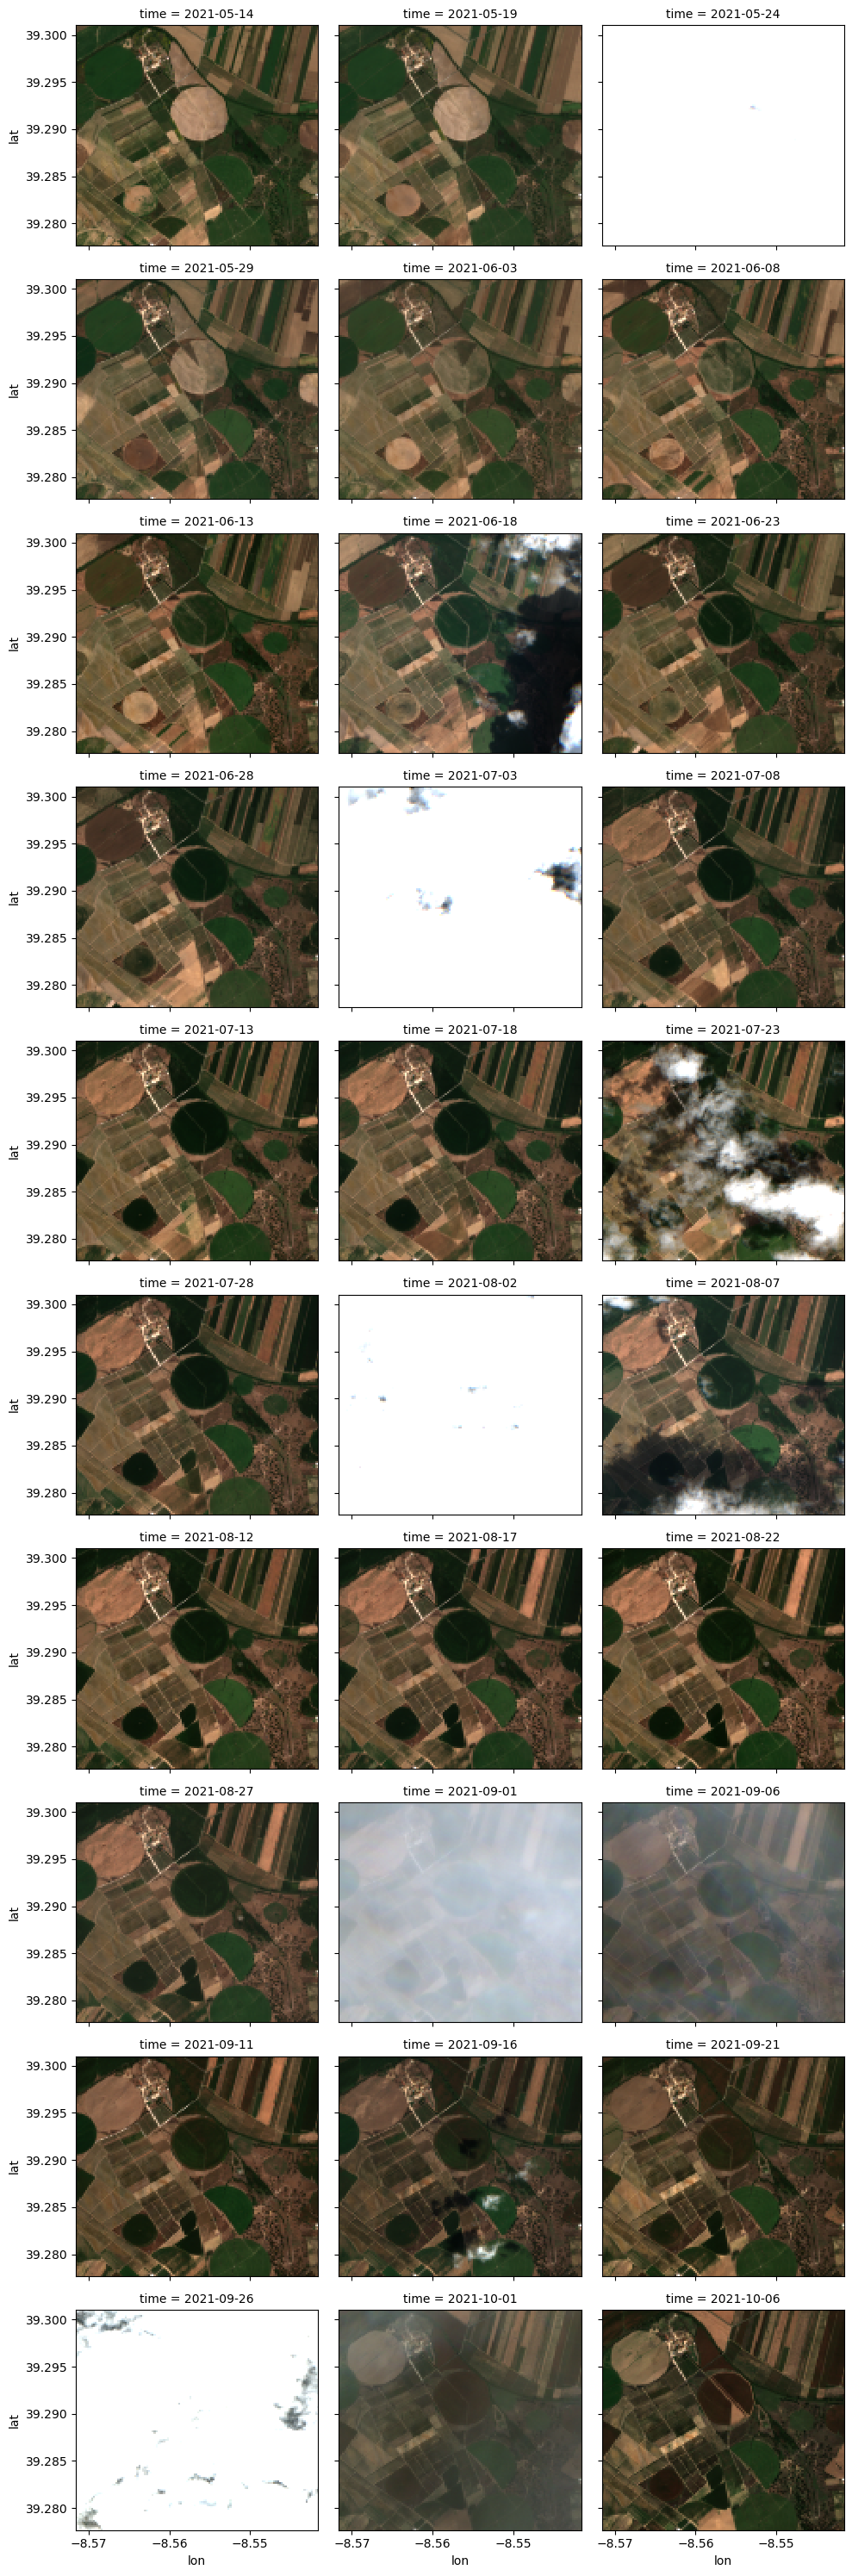

In [19]:
emc.plot_rgb(input, mask=False)

In [ ]:
# bands = ['TG', 'TN', 'TX', 'RR', 'PP', 'HU', 'FG', 'QQ']
bands = ["TG"]
paths = ["C://Users//dozhang//Downloads//tg_ens_mean_0.1deg_reg_v26.0e.nc"]
bands_dict = dict(zip(bands, paths))
specs = {
    "lon_lat": (-8.56, 39.29), # center pixel
    "xy_shape": (256, 256), # width, height of cutout around center pixel
    "resolution": 10, # in meters.. will use this on a local UTM grid..
    "time_interval": "2021-05-10/2021-10-06",
    "providers": [
        {
            "name": "s2",
            "kwargs": {
                "bands": ["B02", "B03", "B04", "B8A", "SCL"],  # , "B09", "B11", "B12"],
                "best_orbit_filter": True,
                "five_daily_filter": False,
                "brdf_correction": True,
                "cloud_mask": True,
                "cloud_mask_rescale_factor": 2,
                "aws_bucket": "planetary_computer",
            },
        },

            # RasterioIOError('CURL error: schannel: CertGetCertificateChain trust error CERT_TRUST_IS_UNTRUSTED_ROOT')
            # {"name": "srtm", "kwargs": {"bands": ["dem"]}},
            
            {"name": "nasa", "kwargs": {}},
            {"name": "alos", "kwargs": {}},
            {"name": "cop", "kwargs": {}},
        {
            "name": "esawc",
            "kwargs": {"bands": ["lc"], "aws_bucket": "planetary_computer"},
        },
        # {
        #     "name": "geom",
        #     "kwargs": {"filepath": "downloads/Geomorphons/geom/geom_90M_africa_europe.tif"}
        # }
        # Also Missing here: EOBS v26 https://surfobs.climate.copernicus.eu/dataaccess/access_eobs.php#datafiles
        {
            "name": "eobs",
            "kwargs": {"bands": bands_dict}
        }
    ],
}

In [3]:
cube = emc.load_minicube(specs, compute = True)

Loading Sentinel2 for 2021-05-10/2021-05-31
Loading EOBS for 2021-05-10/2021-05-31


AttributeError: 'zip' object has no attribute 'keys'

In [22]:
cube

<xarray.Dataset> Size: 96MB
Dimensions:   (time: 30, lon: 256, lat: 256)
Coordinates:
  * time      (time) datetime64[ns] 240B 2020-01-05 2020-01-10 ... 2020-05-29
  * lon       (lon) float64 2kB -8.575 -8.575 -8.575 ... -8.545 -8.545 -8.545
  * lat       (lat) float64 2kB 39.3 39.3 39.3 39.3 ... 39.28 39.28 39.28 39.28
    angle     <U7 28B 'Zenith'
Data variables:
    s2_SCL    (time, lat, lon) float64 16MB 5.0 5.0 5.0 5.0 ... 4.0 4.0 4.0 4.0
    s2_mask   (time, lat, lon) float64 16MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    s2_avail  (time) float32 120B 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    s2_B02    (time, lat, lon) float64 16MB 0.05266 0.05317 ... 0.07636 0.07237
    s2_B03    (time, lat, lon) float64 16MB 0.07171 0.07414 ... 0.108 0.1049
    s2_B04    (time, lat, lon) float64 16MB 0.09915 0.1025 ... 0.1217 0.1148
    s2_B8A    (time, lat, lon) float64 16MB 0.1414 0.1469 ... 0.3362 0.3356
    nasa_dem  (lat, lon) float64 524kB 11.01 10.94 10.52 ... 17.42 17.31 17.05
    alos_dem  (lat, lon) float64 524kB 13.14 12.63 11.97 ... 16.72 16.4 16.34
    cop_dem   (lat, lon) float64 524kB 11.99 11.89 11.9 ... 16.38 16.53 16.63
    esawc_lc  (lat, lon) float32 262kB 40.0 40.0 40.0 40.0 ... 30.0 30.0 30.0
Attributes:
    history:  Created on 2025-09-23 11:47:35.991096 with the earthnet-minicub...

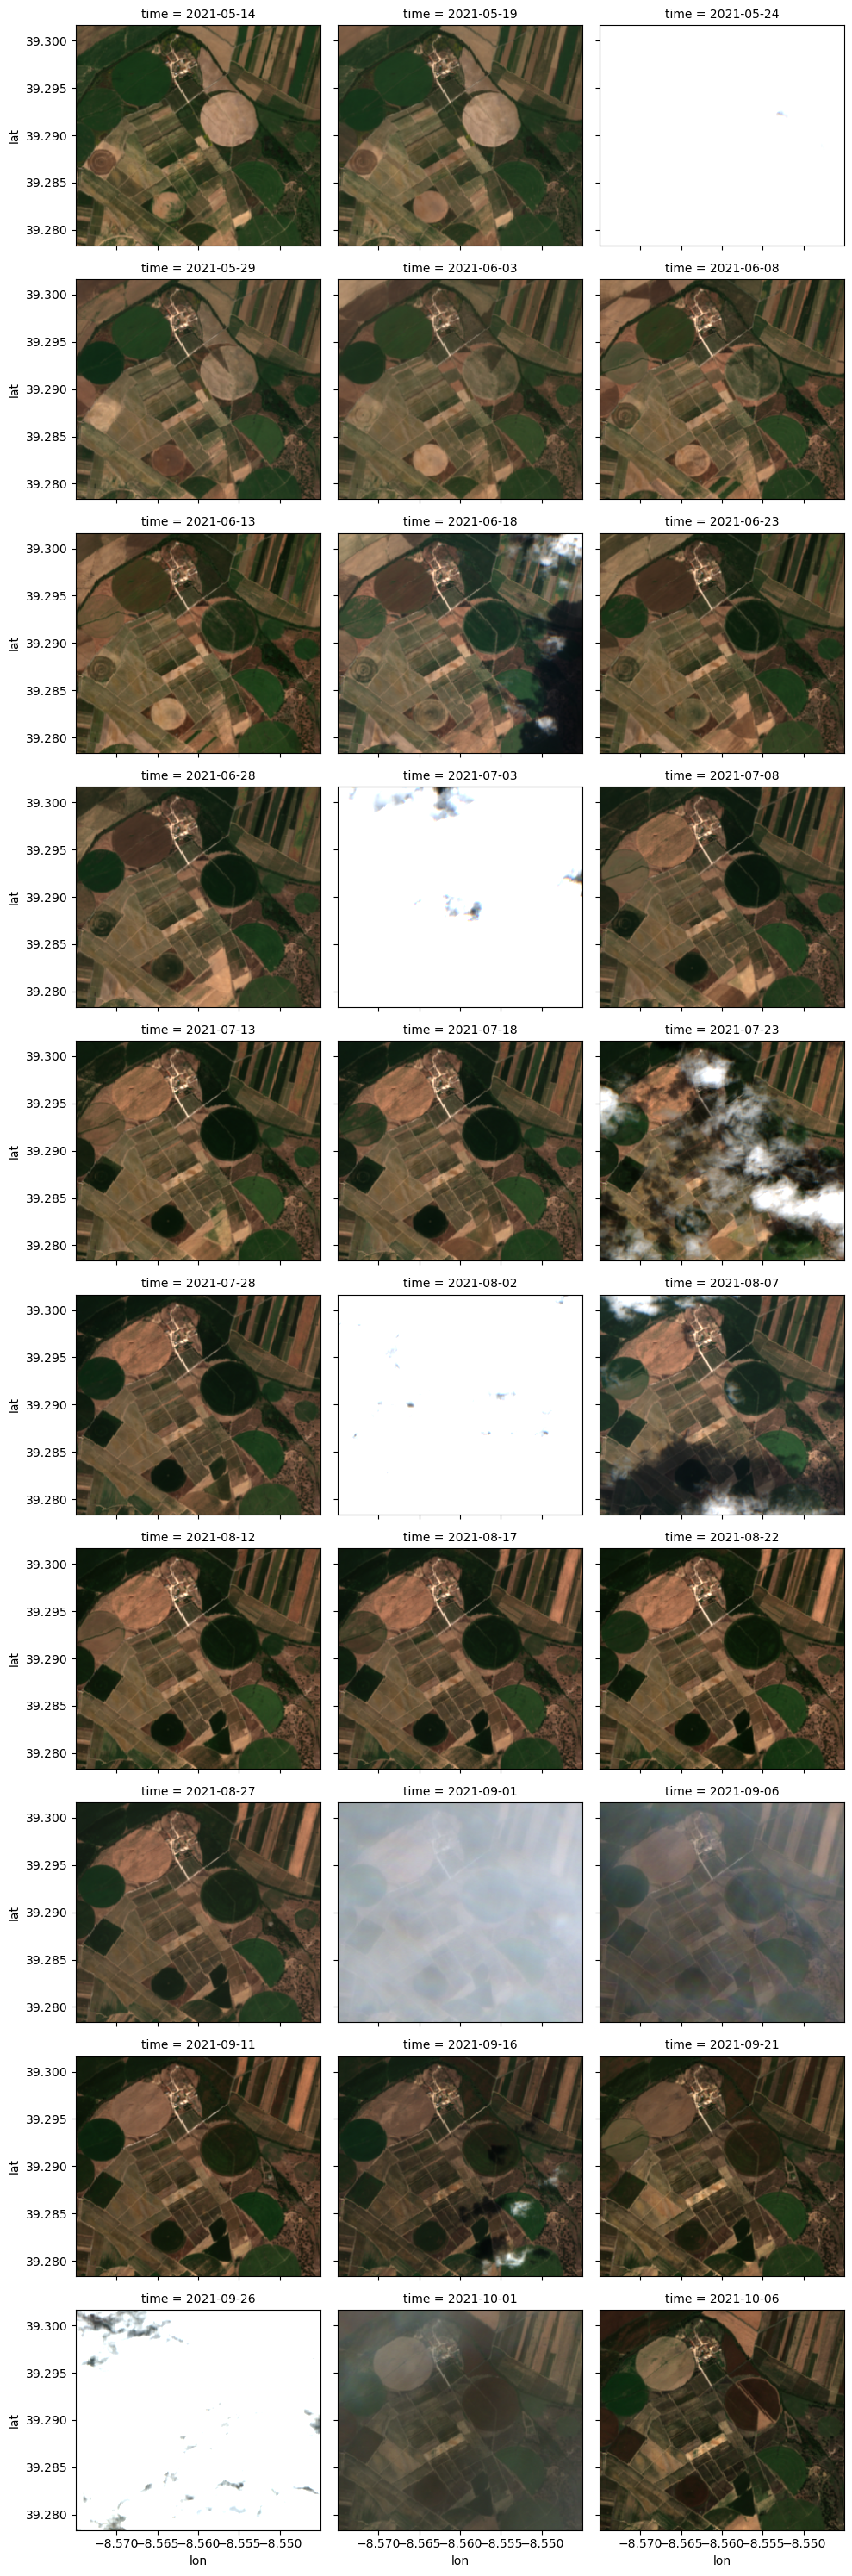

In [27]:
emc.plot_rgb(cube, mask=False)

### If instead of on-the-fly, you prefer to save the minicube to disk:

In [7]:
cube = emc.Minicuber.save_minicube(specs,"minicube.nc")

# Folium plot

In [28]:
def map(minicube):
    x_min, x_max, y_min, y_max = minicube.lon[0].values, minicube.lon[-1].values, minicube.lat[-1].values, minicube.lat[0].values
    # Create map
    interactive_map = folium.Map(
        location=((y_min+y_max)/2, (x_min+x_max)/2),
        zoom_start=min(int((np.log(1000 / (x_max-x_min)) / np.log(2))), int((np.log(1000 / (y_max-y_min)) / np.log(2)))),
        tiles="http://mt1.google.com/vt/lyrs=y&z={z}&x={x}&y={y}",
        attr="Google",
        prefer_canvas=True,
    )
    
    folium.TileLayer('openstreetmap', show=False).add_to(interactive_map)
    
    # Create bounding box coordinates to overlay on map
    line_segments = [
        (y_min, x_min),
        (y_min, x_max),
        (y_max, x_max),
        (y_max, x_min),
        (y_min, x_min),
    ]

    # Add bounding box as an overlay
    interactive_map.add_child(
        folium.features.PolyLine(locations=line_segments, color="red", opacity=0.8)
    )
    #folium.PolyLine(locations=line_segments, color="red", opacity=0.8).add_to(interactive_map)
    
    return interactive_map

In [29]:
# PARAMS
S2_t = 1

In [30]:
rgb = cube[["s2_B04", "s2_B03", "s2_B02"]].to_array("band").isel(time=S2_t).to_numpy()
rgb = np.nan_to_num(rgb, nan=0.0)
rgb = np.swapaxes(rgb, 0, 2)
rgb = np.swapaxes(rgb, 0, 1)

In [34]:
srtm = cube.nasa_dem.to_numpy()
srtm = (srtm-np.nanmin(srtm))/np.nanmax(srtm) #minmax scale
srtm = np.nan_to_num(srtm, nan=np.nanmean(srtm))

mask = cube["s2_mask"].isel(time=S2_t).where(lambda x: x>0).to_numpy()
mask = np.nan_to_num(mask, nan=0.0)


lc = cube.esawc_lc.to_numpy()
lc = np.nan_to_num(lc, nan=0.0)

# ndvi_clims=[]
# for i in range(12):
#     clim = cube.ndviclim_mean.isel(time_clim=i).to_numpy()
#     clim = np.nan_to_num(clim, nan=0.0)
#     month = datetime.datetime.strptime(str(i+1), "%m").strftime("%b")
#     ndvi_clims.append({"month": month, "ndvi_mean": clim})

In [35]:
lc = cube.esawc_lc.to_numpy()
lc = np.nan_to_num(lc, nan=0.0)


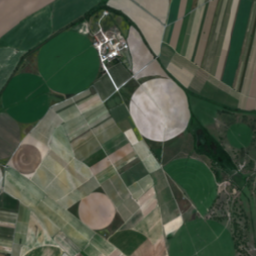
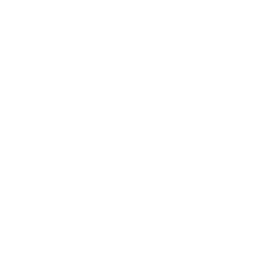
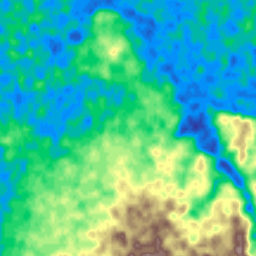
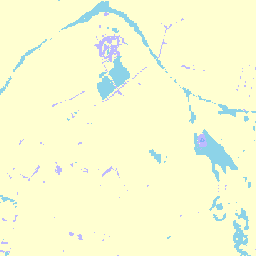

In [36]:
interactive_map = map(cube)

bounds = [[float(cube.lat[-1].values), float(cube.lon[0].values)], [float(cube.lat[0].values), float(cube.lon[-1].values)]]

# Add RGB layer
folium.raster_layers.ImageOverlay(
    image=rgb,
    bounds=bounds,
    mercator_project=True,
    name="Sentinel 2 RGB",
    opacity=0.95,
).add_to(interactive_map)

# Add cloud layer
folium.raster_layers.ImageOverlay(
    image=mask,
    bounds=bounds,
    mercator_project=True,
    name="S2 Mask",
    colormap = lambda x: (1, x/10, -x/2, x),
).add_to(interactive_map)


# Add SRTM
folium.raster_layers.ImageOverlay(
    image=srtm,
    bounds=bounds,
    mercator_project=True,
    name="SRTM",
    opacity=0.75,
    show=False,
    colormap = plt.get_cmap("terrain"),
).add_to(interactive_map)

# Add ESA-WC
folium.raster_layers.ImageOverlay(
    image=lc/255,
    bounds=bounds,
    mercator_project=True,
    name="ESA WorldCover",
    opacity=0.8,
    show=False,
    colormap = plt.get_cmap("Set3"),
).add_to(interactive_map)

# # Add NDVI Climatology
# for clim in ndvi_clims:
#     folium.raster_layers.ImageOverlay(
#         image=clim['ndvi_mean'],
#         bounds=bounds,
#         mercator_project=True,
#         name=f"NDVI {clim['month']}",
#         opacity=0.9,
#         show=False,
#         colormap = cmap_veg,
#     ).add_to(interactive_map)
    
folium.map.LayerControl(position='topright', collapsed=False, autoZIndex=True).add_to(interactive_map)

interactive_map

# Other Plots

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


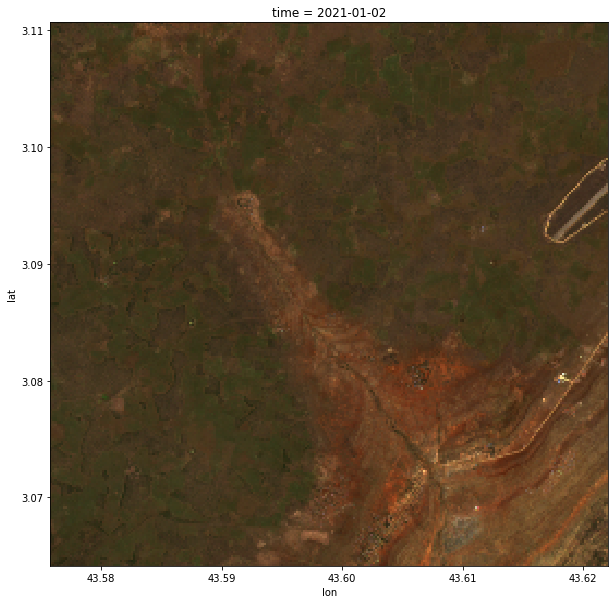

In [38]:
rgb_brightness_scaling=3

(cube[["s2_B04", "s2_B03", "s2_B02"]].to_array("band").isel(time = S2_t) * rgb_brightness_scaling).plot.imshow(rgb="band", figsize = (10, 10))

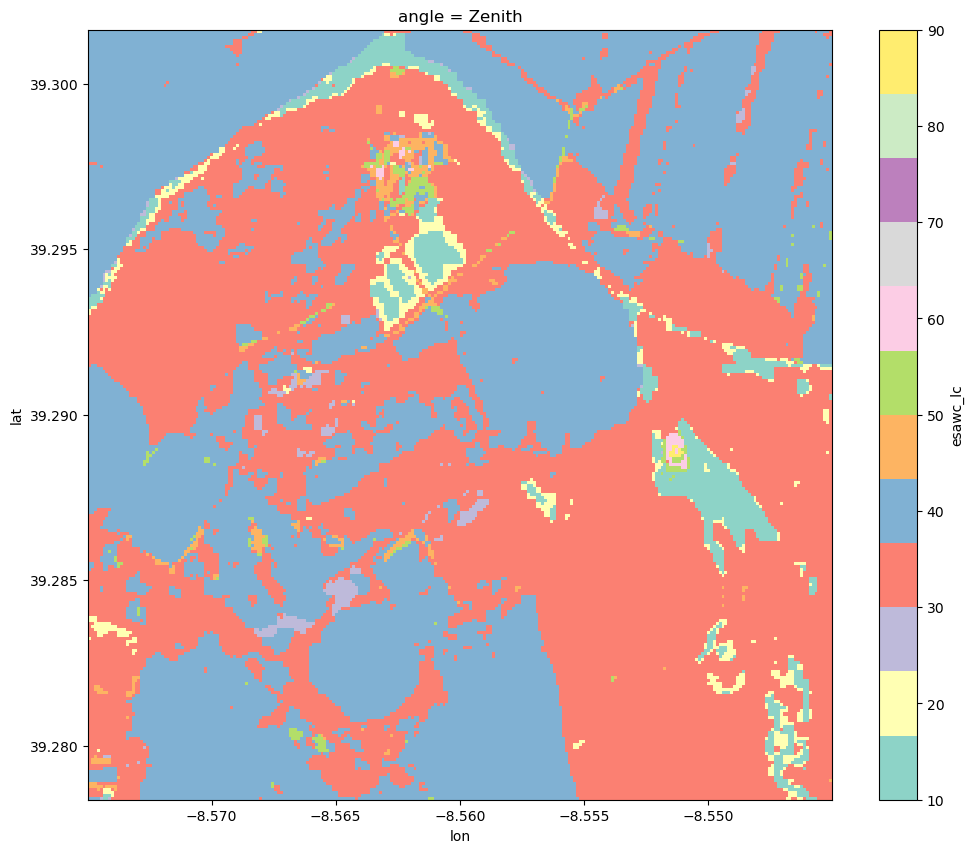

In [39]:
cube.esawc_lc.plot(cmap="Set3", figsize = (12, 10))

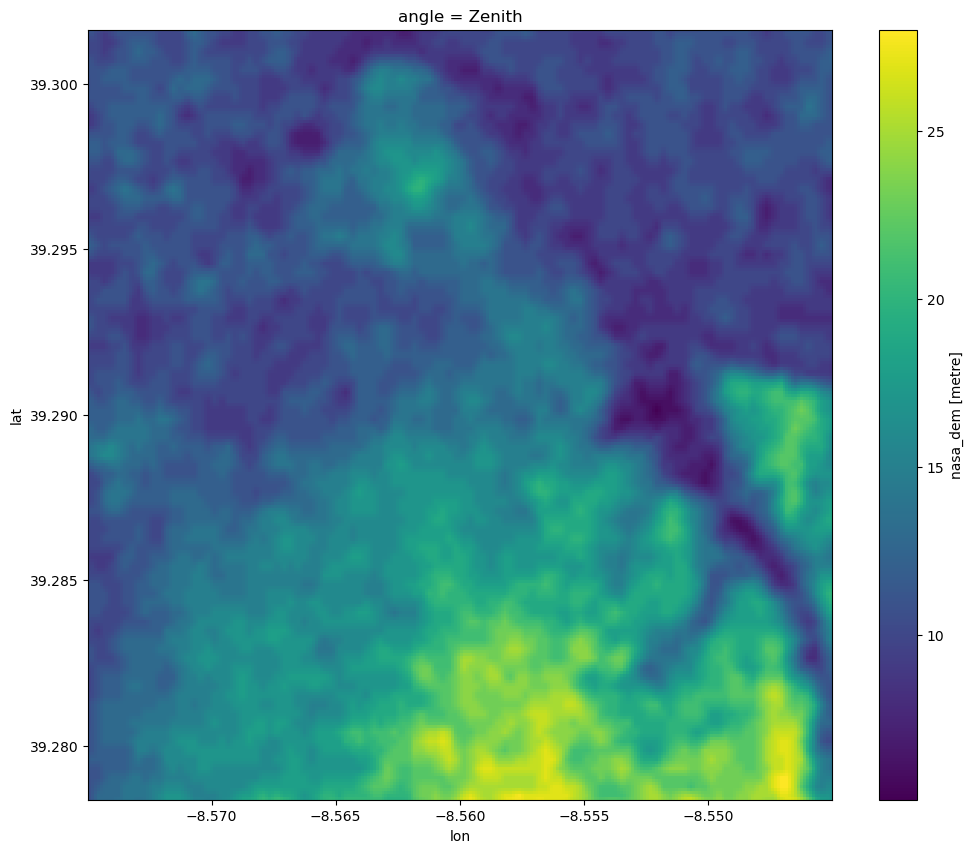

In [41]:
cube.nasa_dem.plot.imshow(figsize = (12, 10))

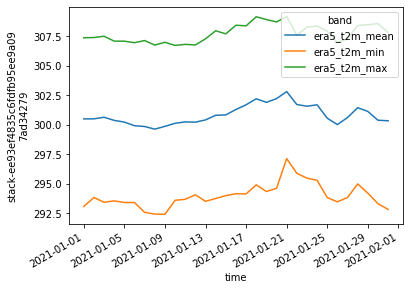

In [ ]:
cube[["era5_t2m_mean","era5_t2m_min","era5_t2m_max"]].to_array("band").plot(hue = "band")